In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
data = pd.read_csv('../pro-test/data/iraq_1_drop_non_impact_params.csv')
data.head(5)

,recordnumber,nameofevent,startdate,endate,ongoing,governorate,district,location,gpslatend,gpslongend,...,beltegeyyarepress,militiarepress,partyrepress,employerrepress,ISISrepress,otherrepress,killed,injured,arrested,response
0,201909011,NaN,2019-06-24,2019-09-24,1.0,Baghdad,NaN,وزارة النفط,33.340440,44.433313,...,0,0,0,0,0,0,0.0,0.0,0.0,Negotiations ongoing
1,201909010,NaN,2019-08-19,2019-09-25,1.0,Baghdad,NaN,مكتب رئيس الوزراء,33.311670,44.391305,...,0,0,0,0,0,0,0.0,0.0,0.0,Authorities not responding or ignoring
2,201909020,NaN,2019-09-02,NaN,0.0,Erbil,NaN,مجلس الوزراء,36.193625,43.995335,...,0,0,0,0,0,0,0.0,0.0,0.0,Authorities not responding or ignoring
3,201909017,NaN,2019-09-02,NaN,0.0,Basrah,NaN,مطار البصرة,30.553304,47.668227,...,0,0,0,0,0,0,0.0,0.0,0.0,Authorities not responding or ignoring
4,201909019,NaN,2019-09-02,NaN,0.0,Missan,NaN,شركة نفط ميسان,31.820092,47.162640,...,0,0,0,0,0,0,0.0,0.0,6.0,Authorities not responding or ignoring


In [52]:
data.shape

(2641, 78)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2641 entries, 0 to 2640
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   recordnumber       2641 non-null   int64  
 1   nameofevent        88 non-null     object 
 2   startdate          2641 non-null   object 
 3   endate             174 non-null    object 
 4   ongoing            2639 non-null   float64
 5   governorate        2638 non-null   object 
 6   district           938 non-null    object 
 7   location           2635 non-null   object 
 8   gpslatend          1632 non-null   float64
 9   gpslongend         1632 non-null   float64
 10  locationtypeend    2635 non-null   object 
 11  gpslatstart        82 non-null     float64
 12  gpslongstart       82 non-null     float64
 13  locationtypestart  103 non-null    object 
 14  sizeexact          18 non-null     float64
 15  sizeestimate       2621 non-null   float64
 16  demandtypeone      2638 

In [66]:
""" Selected the most important columns """

data2 = data[['governorate','location','locationtypeend','sizeexact','sizeestimate','demandtypeone','govresign',
'antiUS','antiIran','antiSoleimani','proUS','proIran','proSoleimani','organizer','orgtypefirst','orgtypesecond',
'sector','industryfirst','tacticprimary','tacticsecondary','violence','repression']]

In [86]:
corr = data.corr().abs()
corr[corr == 1] = 0
unstacked = corr.unstack()
sorted_ = unstacked.sort_values(ascending=False)

sorted_[2:60].to_frame()

,,0
sizeexact,rubberbullets,0.996145
rubberbullets,sizeexact,0.996145
gpslatstart,gpslongend,0.793310
gpslongend,gpslatstart,0.793310
sizeexact,killed,0.582589
killed,sizeexact,0.582589
gpslongend,gpslatend,0.578563
gpslatend,gpslongend,0.578563
policerepress,teargas,0.573110
teargas,policerepress,0.573110


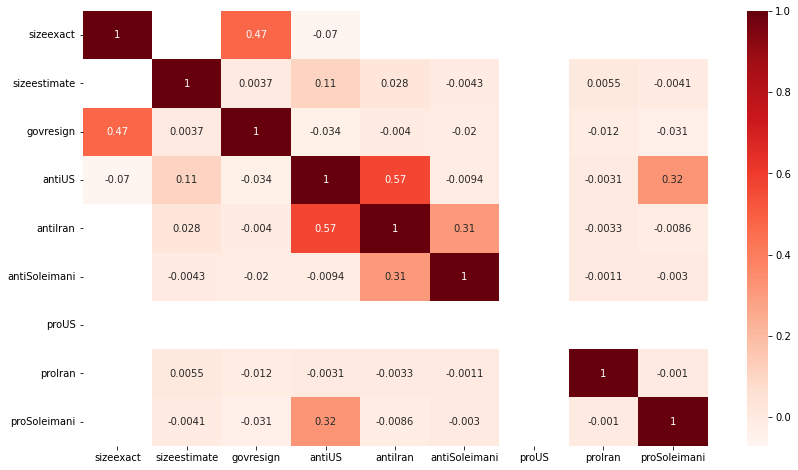

In [85]:
plt.figure(figsize=(14,8))
corr = data2.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Reds")